In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
census = pd.read_csv('Census.csv')

In [5]:
census.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [6]:
census['No of hours'].fillna(method='bfill', inplace=True)

In [7]:
census.shape

(569740, 19)

Turn values that include -9 to categorical and then back to numerical using label encoder

In [8]:
census['Family Composition'] = census['Family Composition'].replace([1,2,3,4,5,6,-9], ['Not in a family', 'Married/same-sex civil partnership couple family', 'Cohabiting couple family', 'Lone parent family(male head)', 'Lone parent family(female head)', 'Other related family', 'No code required'])
print(census['Family Composition'].value_counts())
census['Country of Birth'] = census['Country of Birth'].replace([1, 2, -9], ['UK', 'Non UK', 'No Code Required'])
print(census['Country of Birth'].value_counts())
census['Health'] = census['Health'].replace([1, 2, 3, 4, 5, -9], ['Very good health', 'Good health', 'Fair health', 'Bad health', 'Very bad health', 'No code required'])
print(census['Health'].value_counts())
census['Ethnic Group'] = census['Ethnic Group'].replace([1, 2, 3, 4, 5, -9], ['White', 'Mixed', 'Asian and Asian British', 'Black or Black British', 'Chinese or Other ethnic group', 'Not resident in England or Wales, students or schoolchildren living away during term-time'])
print(census['Ethnic Group'].value_counts())
census['Religion'] = census['Religion'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['No religion', 'Christian', 'Buddhist', 'Hindu', 'Jewish',  'Muslim', 'Sikh', 'Other religion', 'Not stated', 'No code required'])
print(census['Religion'].value_counts())
census['Economic Activity'] = census['Economic Activity'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Economically active: Employee', 'Economically active: Self-employed', 'Economically active: Unemployed', 'Economically active: Full-time student', 'Economically inactive: Retired',  'Economically inactive: Student', 'Economically inactive: Looking after home or family', 'Economically inactive: Long-term sick or disabled', 'Economically inactive: Other', 'No code required'])
print(census['Economic Activity'].value_counts())
census['Occupation'] = census['Occupation'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Managers, Directors and Senior Officials', 'Professional Occupations', 'Associate Professional and Technical Occupations', 'Administrative and Secretarial Occupations', 'Skilled Trades Occupations',  'Caring, Leisure and Other Service Occupations', 'Sales and Customer Service Occupations', 'Process, Plant and Machine Operatives', 'Elementary Occupations', 'No code required'])
print(census['Occupation'].value_counts())
census['Industry'] = census['Industry'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9], ['Agriculture, forestry and fishing', 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply', 'Construction', 'Wholesale and retail trade; Repair of motor vehicles and motorcycles', 'Accommodation and food service activities',  'Transport and storage; Information and communication', 'Financial and insurance activities; Intermediation', 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies', 'No code required'])
print(census['Industry'].value_counts())
census['Hours worked per week'] = census['Hours worked per week'].replace([1, 2, 3, 4, -9], ['Part-time: 15 or less hours worked', 'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'No code required'])
print(census['Hours worked per week'].value_counts())
census['Approximated Social Grade'] = census['Approximated Social Grade'].replace([1, 2, 3, 4, -9], ['AB', 'C1', 'C2', 'DE', 'No code required'])
print(census['Approximated Social Grade'].value_counts())

Married/same-sex civil partnership couple family    300961
Not in a family                                      96690
Cohabiting couple family                             72641
Lone parent family(female head)                      64519
No code required                                     18851
Lone parent family(male head)                         9848
Other related family                                  6230
Name: Family Composition, dtype: int64
UK                  485645
Non UK               77291
No Code Required      6804
Name: Country of Birth, dtype: int64
Very good health    264971
Good health         191743
Fair health          74480
Bad health           24558
Very bad health       7184
No code required      6804
Name: Health, dtype: int64
White                                                                                        483477
Asian and Asian British                                                                       42711
Black or Black British                   

Turn nominal to numeric data

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
census['Region'] = LE.fit_transform(census['Region'])
census['Residence Type'] = LE.fit_transform(census['Residence Type'])
census['Family Composition'] = LE.fit_transform(census['Family Composition'])
census['Country of Birth'] = LE.fit_transform(census['Country of Birth'])
census['Health'] = LE.fit_transform(census['Health'])
census['Ethnic Group'] = LE.fit_transform(census['Ethnic Group'])
census['Religion'] = LE.fit_transform(census['Religion'])
census['Economic Activity'] = LE.fit_transform(census['Economic Activity'])
census['Occupation'] = LE.fit_transform(census['Occupation'])
census['Industry'] = LE.fit_transform(census['Industry'])
census['Hours worked per week'] = LE.fit_transform(census['Hours worked per week'])
census['Approximated Social Grade'] = LE.fit_transform(census['Approximated Social Grade'])
censusSample = census.sample(frac=0.1, replace=False, random_state=0)

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(censusSample.values)
scaled_features_census = pd.DataFrame(scaled_features, index=censusSample.index, columns=censusSample.columns)
scaled_features_census.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04
mean,-2.552137e-15,1.233417e-16,3.165229e-16,1.745989e-17,8.592761e-17,-8.754888e-17,-1.920588e-17,-6.285561e-17,2.035324e-16,-7.333154e-17,1.284549e-16,1.369354e-16,-5.948834e-17,2.057773e-17,1.234664e-17,-1.172307e-16,-8.106378e-18,8.879602e-17,-7.579463e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.731116e+00,-1.802209e+00,-7.163639e+00,-1.802993e+00,-1.187582e-01,-1.014462e+00,-1.345376e+00,-7.628133e-01,-1.879601e+00,-4.635768e+00,-1.838082e+00,-2.975775e+00,-1.192583e+00,-1.064089e+00,-1.736155e+00,-2.130891e+00,-1.359952e+00,-8.765212e-01,-1.489215e+00
25%,-8.637260e-01,-1.035521e+00,1.395939e-01,-5.086482e-01,-1.187582e-01,-1.014462e+00,-8.933820e-01,-7.628133e-01,5.320279e-01,4.004276e-01,-6.960348e-01,3.913967e-01,-7.927935e-01,-1.064089e+00,-5.973298e-01,-6.039444e-01,-1.359952e+00,-8.240468e-01,-7.731805e-01
50%,-5.825569e-03,1.145107e-01,1.395939e-01,1.385240e-01,-1.187582e-01,9.857442e-01,1.060688e-02,1.302785e-01,5.320279e-01,4.004276e-01,-6.960348e-01,3.913967e-01,-7.927935e-01,-2.586997e-01,1.618869e-01,6.834194e-03,3.242541e-01,-8.240468e-01,-5.714555e-02
75%,8.655578e-01,8.811987e-01,1.395939e-01,1.385240e-01,-1.187582e-01,9.857442e-01,9.145957e-01,1.302785e-01,5.320279e-01,4.004276e-01,1.017036e+00,3.913967e-01,1.206154e+00,8.151524e-01,9.211036e-01,9.230021e-01,3.242541e-01,9.600839e-01,6.588894e-01
max,1.735682e+00,1.647887e+00,1.395939e-01,2.080041e+00,1.212763e+01,9.857442e-01,1.818585e+00,2.809554e+00,5.320279e-01,4.004276e-01,1.017036e+00,3.913967e-01,2.405522e+00,1.352078e+00,1.680320e+00,1.533781e+00,2.008460e+00,2.219470e+00,1.374924e+00


In [11]:
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,0,1,3,1,2,6,2,2,2,2,5,1,7,6,6,2,2.0,3
1,7394832,0,1,0,1,2,1,1,2,2,2,5,6,9,5,7,2,2.0,4
2,7394719,0,1,3,1,1,7,2,2,2,5,5,1,7,6,6,2,2.0,1
3,7394840,0,1,5,1,2,6,4,2,2,1,5,1,7,3,0,2,2.0,3
4,7394711,0,1,3,1,1,1,1,1,2,5,5,6,9,5,7,2,2.0,4


In [12]:
pearsoncorr=census.corr(method='pearson')
pearsoncorr

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
Person ID,1.000000,0.108667,0.011954,0.013226,0.009318,0.000713,-0.042578,-0.035477,-0.021902,-0.121653,0.010184,-0.184456,0.021569,0.003910,-0.004229,0.004131,-0.006686,-0.002718,-0.005249
Region,0.108667,1.000000,-0.002683,0.019716,0.015484,-0.000065,-0.000452,-0.007568,-0.002115,-0.067448,0.026581,-0.025579,0.054679,-0.005742,-0.010629,0.006840,-0.006154,0.019147,-0.037341
Residence Type,0.011954,-0.002683,1.000000,-0.109269,-0.066833,0.000245,-0.020930,-0.024958,0.067139,0.030716,0.038233,0.016456,-0.009692,-0.062953,-0.004897,0.005775,-0.037063,0.079088,-0.189946
Family Composition,0.013226,0.019716,-0.109269,1.000000,0.093217,-0.034326,0.284644,0.221034,0.090146,-0.121066,-0.143930,-0.040785,-0.068804,0.003583,-0.008157,-0.006027,-0.000761,-0.029664,-0.099373
Population Base,0.009318,0.015484,-0.066833,0.093217,1.000000,-0.003257,-0.093765,-0.075922,-0.173726,-0.435868,0.005569,-0.072964,0.067585,0.115449,0.012775,-0.003044,0.030728,-0.075590,0.162042
Sex,0.000713,-0.000065,0.000245,-0.034326,-0.003257,1.000000,0.042331,0.129012,0.017002,-0.003508,-0.032204,0.007990,-0.067772,0.039203,-0.200279,-0.037275,0.206667,-0.156448,-0.004478
Age,-0.042578,-0.000452,-0.020930,0.284644,-0.093765,0.042331,1.000000,0.639171,0.614706,0.056499,-0.471759,0.159385,-0.207592,-0.210356,-0.057064,-0.016660,-0.007795,0.068663,-0.401062
Marital Status,-0.035477,-0.007568,-0.024958,0.221034,-0.075922,0.129012,0.639171,1.000000,0.390542,0.027904,-0.319181,0.085739,-0.143106,-0.105486,-0.054370,-0.016098,0.017295,0.019534,-0.190222
Student,-0.021902,-0.002115,0.067139,0.090146,-0.173726,0.017002,0.614706,0.390542,1.000000,0.086595,-0.286053,0.128266,-0.088733,-0.565298,-0.074034,-0.004358,-0.194884,0.401851,-0.432101
Country of Birth,-0.121653,-0.067448,0.030716,-0.121066,-0.435868,-0.003508,0.056499,0.027904,0.086595,1.000000,0.002325,0.422694,-0.050284,-0.008747,-0.018537,0.014365,0.000061,0.002736,-0.031805


Based on correlation the following columns were deleted

In [13]:
del census['Person ID']
del census['Population Base']
del census['Sex']

check on the optimal number of clusters using elbow method

In [14]:
pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

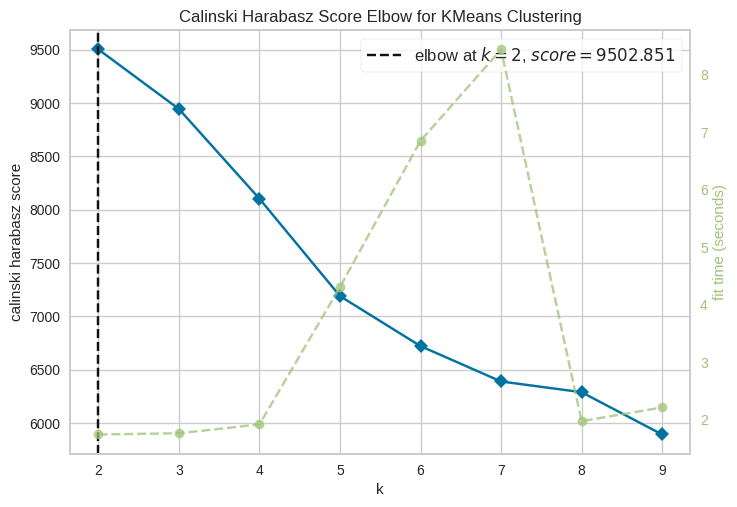

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_census)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

KMeans Clustering

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_census)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [17]:
kmeans.cluster_centers_

array([[-0.01899001, -0.00464726,  0.05006242,  0.09290083, -0.11698853,
         0.0104028 ,  0.4364418 ,  0.27635231,  0.51454478,  0.04090734,
        -0.20546598,  0.09532558, -0.07915192, -0.40738892, -0.05870103,
        -0.00686861, -0.13991657,  0.29403145, -0.3454048 ],
       [ 0.05102013,  0.01248571, -0.13450185, -0.24959509,  0.3143111 ,
        -0.02794902, -1.1725808 , -0.74247107, -1.38241874, -0.10990507,
         0.55202197, -0.25610961,  0.21265612,  1.09452492,  0.15771106,
         0.01845377,  0.37591147, -0.7899693 ,  0.92799322]])

In [18]:
kmeans_silhouette = silhouette_score(scaled_features_census, kmeans.labels_).round(2)
kmeans_silhouette

0.18

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


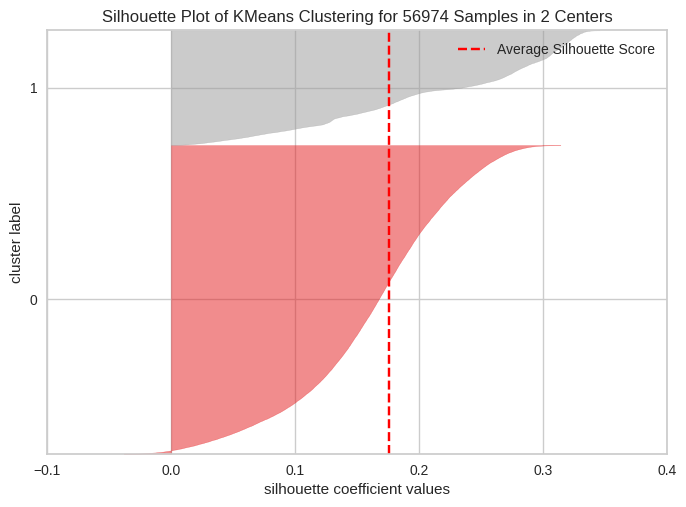

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 56974 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(scaled_features_census)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
#append dataframe with cluster number
scaled_features_census['cluster'] = kmeans.labels_

In [22]:
kmeans.labels_ == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
#view proterties of each cluster
cluster1=scaled_features_census.query("cluster == 0")
cluster2=scaled_features_census.query("cluster == 1")

In [24]:
cluster1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
135914,-0.100892,-1.035521,0.139594,0.138524,-0.118758,-1.014462,1.818585,0.130278,0.532028,0.400428,-1.838082,0.391397,-0.792794,0.815152,-0.217721,1.533781,0.324254,-0.824047,-0.773180,0
1296,-1.718240,-1.802209,0.139594,2.080041,-0.118758,0.985744,0.462601,1.916462,0.532028,0.400428,-0.696035,0.391397,-0.792794,-0.258700,1.300712,1.533781,0.324254,-0.824047,-0.057146,0
313134,-0.327506,-1.418865,0.139594,0.138524,-0.118758,-1.014462,0.010607,0.130278,0.532028,0.400428,-0.696035,0.391397,-0.792794,-1.064089,0.921104,-0.298555,1.166357,-0.456726,-1.489215,0
563622,1.221555,0.497855,0.139594,1.432868,-0.118758,-1.014462,-0.441388,-0.762813,0.532028,0.400428,1.017036,0.391397,-0.792794,-1.064089,-1.356546,0.923002,-0.517849,1.957098,-1.489215,0
269456,1.455410,0.497855,0.139594,-1.155820,-0.118758,0.985744,1.366590,1.916462,0.532028,-2.117670,1.017036,0.391397,-0.792794,0.815152,-0.217721,1.533781,0.324254,-0.824047,-0.773180,0


In [25]:
cluster1.shape

(41529, 20)

In [26]:
cluster1.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
count,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.000000,41529.0
mean,-0.019119,-0.004732,0.050082,0.092708,-0.116989,0.010518,0.436262,0.276192,0.514490,0.040803,-0.205242,0.095147,-0.079047,-0.407279,-0.058681,-0.006814,-0.139796,0.293802,-0.345308,0.0
std,0.992713,1.002970,0.803574,1.008526,0.147191,0.999806,0.798602,1.039821,0.204908,0.881055,0.996844,0.900310,0.990717,0.789897,1.137291,1.122443,1.127996,1.019902,0.814275,0.0
min,-1.731073,-1.802209,-7.163639,-1.802993,-0.118758,-1.014462,-0.893382,-0.762813,-1.879601,-2.117670,-1.838082,-2.975775,-1.192583,-1.064089,-1.736155,-2.130891,-1.359952,-0.876521,-1.489215,0.0
25%,-0.871036,-1.035521,0.139594,0.138524,-0.118758,-1.014462,0.010607,-0.762813,0.532028,0.400428,-0.696035,0.391397,-0.792794,-1.064089,-0.976938,-0.909334,-1.359952,-0.824047,-0.773180,0.0
50%,-0.041046,0.114511,0.139594,0.138524,-0.118758,0.985744,0.462601,0.130278,0.532028,0.400428,-0.696035,0.391397,-0.792794,-1.064089,-0.217721,-0.298555,0.324254,0.382865,-0.773180,0.0
75%,0.830474,0.881199,0.139594,0.138524,-0.118758,0.985744,0.914596,0.130278,0.532028,0.400428,1.017036,0.391397,1.206154,0.546689,0.921104,0.923002,0.324254,1.222456,0.658889,0.0
max,1.735676,1.647887,0.139594,2.080041,12.127634,0.985744,1.818585,2.809554,0.532028,0.400428,1.017036,0.391397,2.405522,1.083615,1.680320,1.533781,2.008460,2.219470,1.374924,0.0


In [27]:
cluster2.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
139683,-0.068769,-0.652177,0.139594,0.138524,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,0.400428,-0.696035,0.391397,-0.792794,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1
247697,1.196479,0.497855,0.139594,-1.155820,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,0.400428,1.017036,0.391397,-0.792794,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1
165644,0.277197,0.881199,0.139594,0.138524,-0.118758,-1.014462,-1.345376,-0.762813,0.532028,0.400428,1.017036,0.391397,1.206154,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1
234438,1.021259,-1.035521,0.139594,0.138524,-0.118758,0.985744,-1.345376,-0.762813,0.532028,-2.117670,1.017036,0.391397,-0.792794,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1
213646,0.764336,-0.268833,0.139594,-1.155820,-0.118758,0.985744,-1.345376,-0.762813,-1.879601,0.400428,1.017036,-0.955472,-0.792794,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1


In [28]:
cluster2.shape

(15445, 20)

In [29]:
cluster2.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster
count,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.000000,15445.0
mean,0.051408,0.012724,-0.134662,-0.249277,0.314563,-0.028281,-1.173036,-0.742633,-1.383378,-0.109713,0.551862,-0.255833,0.212543,1.095105,0.157782,0.018322,0.375887,-0.789983,0.928475,1.0
std,1.017619,0.991922,1.388474,0.932110,1.869506,1.000039,0.293718,0.158284,0.974951,1.259065,0.774102,1.191524,0.993903,0.604951,0.420663,0.548516,0.271803,0.189225,0.850549,0.0
min,-1.731116,-1.802209,-7.163639,-1.802993,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,-4.635768,-1.838082,-2.975775,-1.192583,-1.064089,-1.736155,-2.130891,-1.359952,-0.876521,-1.489215,1.0
25%,-0.839862,-1.035521,0.139594,-1.155820,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,0.400428,-0.125011,-0.282038,-0.792794,1.083615,0.161887,0.006834,0.324254,-0.824047,1.374924,1.0
50%,0.092454,0.114511,0.139594,0.138524,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,0.400428,1.017036,0.391397,0.406575,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1.0
75%,0.953946,0.881199,0.139594,0.138524,-0.118758,0.985744,-0.893382,-0.762813,-1.879601,0.400428,1.017036,0.391397,1.206154,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1.0
max,1.735682,1.647887,0.139594,2.080041,12.127634,0.985744,1.818585,2.809554,0.532028,0.400428,1.017036,0.391397,2.405522,1.352078,1.680320,1.533781,2.008460,2.166996,1.374924,1.0


In [30]:
kmeans.cluster_centers_

array([[-0.01899001, -0.00464726,  0.05006242,  0.09290083, -0.11698853,
         0.0104028 ,  0.4364418 ,  0.27635231,  0.51454478,  0.04090734,
        -0.20546598,  0.09532558, -0.07915192, -0.40738892, -0.05870103,
        -0.00686861, -0.13991657,  0.29403145, -0.3454048 ],
       [ 0.05102013,  0.01248571, -0.13450185, -0.24959509,  0.3143111 ,
        -0.02794902, -1.1725808 , -0.74247107, -1.38241874, -0.10990507,
         0.55202197, -0.25610961,  0.21265612,  1.09452492,  0.15771106,
         0.01845377,  0.37591147, -0.7899693 ,  0.92799322]])

In [31]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [32]:
cluster1_mean

array([-0.01899001, -0.00464726,  0.05006242,  0.09290083, -0.11698853,
        0.0104028 ,  0.4364418 ,  0.27635231,  0.51454478,  0.04090734,
       -0.20546598,  0.09532558, -0.07915192, -0.40738892, -0.05870103,
       -0.00686861, -0.13991657,  0.29403145, -0.3454048 ])

In [33]:
cluster2_mean

array([ 0.05102013,  0.01248571, -0.13450185, -0.24959509,  0.3143111 ,
       -0.02794902, -1.1725808 , -0.74247107, -1.38241874, -0.10990507,
        0.55202197, -0.25610961,  0.21265612,  1.09452492,  0.15771106,
        0.01845377,  0.37591147, -0.7899693 ,  0.92799322])

In [34]:
cluster1_mean_p1 = cluster1_mean[:8]

In [35]:
cluster1_mean_p1

array([-0.01899001, -0.00464726,  0.05006242,  0.09290083, -0.11698853,
        0.0104028 ,  0.4364418 ,  0.27635231])

In [36]:
cluster2_mean_p1 = cluster2_mean[:8]

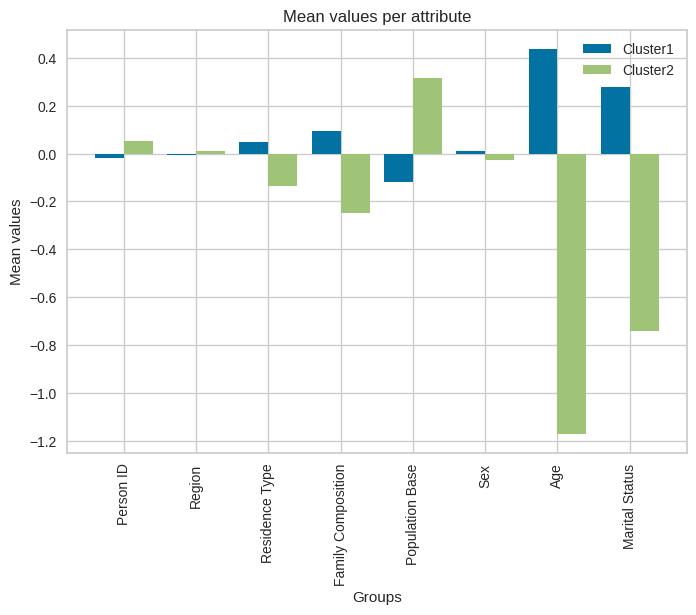

In [37]:
X = cluster1.keys()[:8]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [38]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

In [39]:
cluster1_mean_p2

array([ 0.51454478,  0.04090734, -0.20546598,  0.09532558, -0.07915192,
       -0.40738892, -0.05870103, -0.00686861, -0.13991657,  0.29403145,
       -0.3454048 ])

In [40]:
cluster1.keys()[8:-2]

Index(['Student', 'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours'],
      dtype='object')

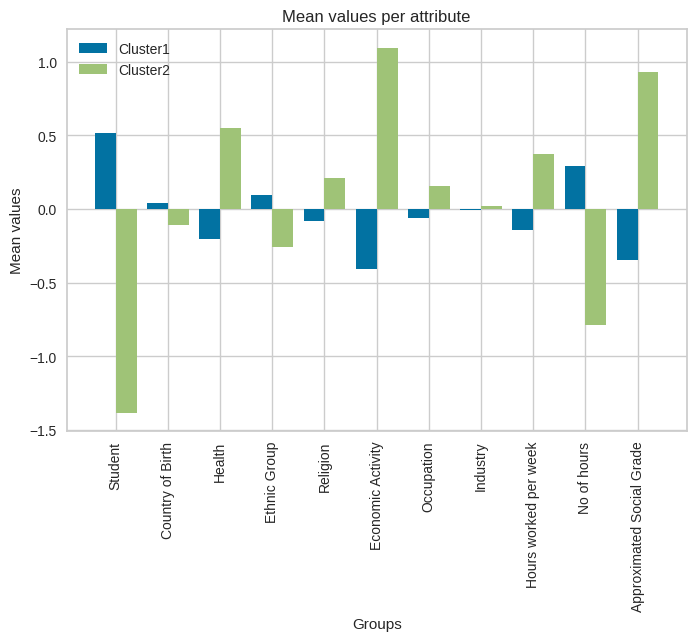

In [41]:
X = cluster1.keys()[8:-1]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

Agglomerative hierarchical clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering
X = scaled_features_census
cluster= AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
cluster.fit(X)
labels = cluster.labels_

# Get the number of clusters
num_clusters = cluster.n_clusters_

print(f"Number of clusters: {num_clusters}")

Number of clusters: 56974


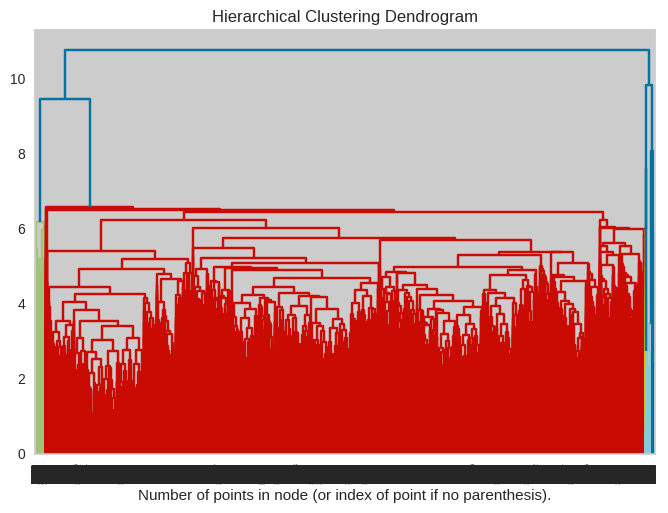

In [43]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [44]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster.fit(X)

AgglomerativeClustering(linkage='average')

In [45]:
cluster.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
Agglomerative_silhouette = silhouette_score(scaled_features_census, cluster.labels_).round(2)
Agglomerative_silhouette

0.46

In [47]:
X['cluster_no'] = cluster.labels_

In [48]:
X.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,...,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
135914,-0.100892,-1.035521,0.139594,0.138524,-0.118758,-1.014462,1.818585,0.130278,0.532028,0.400428,...,0.391397,-0.792794,0.815152,-0.217721,1.533781,0.324254,-0.824047,-0.773180,0,1
1296,-1.718240,-1.802209,0.139594,2.080041,-0.118758,0.985744,0.462601,1.916462,0.532028,0.400428,...,0.391397,-0.792794,-0.258700,1.300712,1.533781,0.324254,-0.824047,-0.057146,0,1
313134,-0.327506,-1.418865,0.139594,0.138524,-0.118758,-1.014462,0.010607,0.130278,0.532028,0.400428,...,0.391397,-0.792794,-1.064089,0.921104,-0.298555,1.166357,-0.456726,-1.489215,0,1
563622,1.221555,0.497855,0.139594,1.432868,-0.118758,-1.014462,-0.441388,-0.762813,0.532028,0.400428,...,0.391397,-0.792794,-1.064089,-1.356546,0.923002,-0.517849,1.957098,-1.489215,0,1
139683,-0.068769,-0.652177,0.139594,0.138524,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,0.400428,...,0.391397,-0.792794,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924,1,1


In [49]:
X.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,...,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,...,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,5.697400e+04,56974.000000,56974.000000
mean,-2.552137e-15,1.233417e-16,3.165229e-16,1.745989e-17,8.592761e-17,-8.754888e-17,-1.920588e-17,-6.285561e-17,2.035324e-16,-7.333154e-17,...,1.369354e-16,-5.948834e-17,2.057773e-17,1.234664e-17,-1.172307e-16,-8.106378e-18,8.879602e-17,-7.579463e-17,0.271089,0.984431
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.444526,0.123800
min,-1.731116e+00,-1.802209e+00,-7.163639e+00,-1.802993e+00,-1.187582e-01,-1.014462e+00,-1.345376e+00,-7.628133e-01,-1.879601e+00,-4.635768e+00,...,-2.975775e+00,-1.192583e+00,-1.064089e+00,-1.736155e+00,-2.130891e+00,-1.359952e+00,-8.765212e-01,-1.489215e+00,0.000000,0.000000
25%,-8.637260e-01,-1.035521e+00,1.395939e-01,-5.086482e-01,-1.187582e-01,-1.014462e+00,-8.933820e-01,-7.628133e-01,5.320279e-01,4.004276e-01,...,3.913967e-01,-7.927935e-01,-1.064089e+00,-5.973298e-01,-6.039444e-01,-1.359952e+00,-8.240468e-01,-7.731805e-01,0.000000,1.000000
50%,-5.825569e-03,1.145107e-01,1.395939e-01,1.385240e-01,-1.187582e-01,9.857442e-01,1.060688e-02,1.302785e-01,5.320279e-01,4.004276e-01,...,3.913967e-01,-7.927935e-01,-2.586997e-01,1.618869e-01,6.834194e-03,3.242541e-01,-8.240468e-01,-5.714555e-02,0.000000,1.000000
75%,8.655578e-01,8.811987e-01,1.395939e-01,1.385240e-01,-1.187582e-01,9.857442e-01,9.145957e-01,1.302785e-01,5.320279e-01,4.004276e-01,...,3.913967e-01,1.206154e+00,8.151524e-01,9.211036e-01,9.230021e-01,3.242541e-01,9.600839e-01,6.588894e-01,1.000000,1.000000
max,1.735682e+00,1.647887e+00,1.395939e-01,2.080041e+00,1.212763e+01,9.857442e-01,1.818585e+00,2.809554e+00,5.320279e-01,4.004276e-01,...,3.913967e-01,2.405522e+00,1.352078e+00,1.680320e+00,1.533781e+00,2.008460e+00,2.219470e+00,1.374924e+00,1.000000,1.000000


In [50]:
cluster1A = X.query("cluster_no ==0")
cluster2A = X.query("cluster_no == 1")

In [51]:
len(cluster1A.value_counts())

887

In [52]:
len(cluster2A.value_counts())

56087

In [53]:
cluster1A.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,...,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,887.000000,887.000000,887.000000,8.870000e+02,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,8.870000e+02,887.000000,887.0
mean,0.062998,0.130069,-0.387359,7.856962e-01,7.509350,-0.049312,-0.844972,-0.682264,-1.615871,-4.016889,...,-0.472604,0.653119,1.101775,0.134497,-0.003839,0.298621,-0.709396,1.374924e+00,0.993236,0.0
std,1.025141,0.963627,1.890716,2.221699e-16,2.637794,1.000056,0.363435,0.385157,0.753063,1.084764,...,0.850744,0.550134,0.636217,0.390461,0.470599,0.415962,0.451091,2.221699e-16,0.082013,0.0
min,-1.729564,-1.802209,-7.163639,7.856962e-01,6.004438,-1.014462,-1.345376,-0.762813,-1.879601,-4.635768,...,-2.975775,-1.192583,-1.064089,-1.736155,-2.130891,-1.359952,-0.824047,1.374924e+00,0.000000,0.0
25%,-0.823892,-0.652177,0.139594,7.856962e-01,6.004438,-1.014462,-0.893382,-0.762813,-1.879601,-4.635768,...,-0.282038,0.806364,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924e+00,1.000000,0.0
50%,0.085249,0.497855,0.139594,7.856962e-01,6.004438,-1.014462,-0.893382,-0.762813,-1.879601,-4.635768,...,-0.282038,0.806364,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924e+00,1.000000,0.0
75%,1.059540,0.881199,0.139594,7.856962e-01,6.004438,0.985744,-0.893382,-0.762813,-1.879601,-4.635768,...,-0.282038,0.806364,1.352078,0.161887,0.006834,0.324254,-0.824047,1.374924e+00,1.000000,0.0
max,1.721990,1.647887,0.139594,7.856962e-01,12.127634,0.985744,1.818585,2.809554,0.532028,-2.117670,...,0.391397,2.405522,1.352078,1.680320,1.533781,2.008460,2.166996,1.374924e+00,1.000000,0.0


In [54]:
cluster2A.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,...,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,cluster,cluster_no
count,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,...,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.000000,56087.0
mean,-0.000996,-0.002057,0.006126,-0.012426,-0.118758,0.000780,0.013363,0.010790,0.025555,0.063526,...,0.007474,-0.010329,-0.017424,-0.002127,0.000061,-0.004723,0.011219,-0.021744,0.259668,1.0
std,0.999584,1.000446,0.978238,1.002953,0.000000,0.999997,1.001137,1.003001,0.982307,0.859085,...,1.000406,1.002097,0.994956,1.006545,1.006148,1.005817,1.002264,0.992705,0.438456,0.0
min,-1.731116,-1.802209,-7.163639,-1.802993,-0.118758,-1.014462,-1.345376,-0.762813,-1.879601,-4.635768,...,-2.975775,-1.192583,-1.064089,-1.736155,-2.130891,-1.359952,-0.876521,-1.489215,0.000000,1.0
25%,-0.864418,-1.035521,0.139594,-0.508648,-0.118758,-1.014462,-0.893382,-0.762813,0.532028,0.400428,...,0.391397,-0.792794,-1.064089,-0.597330,-0.603944,-1.359952,-0.824047,-0.773180,0.000000,1.0
50%,-0.006842,0.114511,0.139594,0.138524,-0.118758,0.985744,0.010607,0.130278,0.532028,0.400428,...,0.391397,-0.792794,-0.258700,0.161887,0.006834,0.324254,-0.824047,-0.057146,0.000000,1.0
75%,0.863659,0.881199,0.139594,0.138524,-0.118758,0.985744,0.914596,0.130278,0.532028,0.400428,...,0.391397,1.206154,0.815152,0.921104,0.923002,0.324254,0.960084,0.658889,1.000000,1.0
max,1.735682,1.647887,0.139594,2.080041,-0.118758,0.985744,1.818585,2.809554,0.532028,0.400428,...,0.391397,2.405522,1.352078,1.680320,1.533781,2.008460,2.219470,1.374924,1.000000,1.0


In [55]:
cluster1A_mean = np.array(cluster1A.mean())
cluster2A_mean = np.array(cluster2A.mean())

In [56]:
cluster1A_mean_p1 = cluster1A_mean[:8]
cluster2A_mean_p1 = cluster2A_mean[:8]

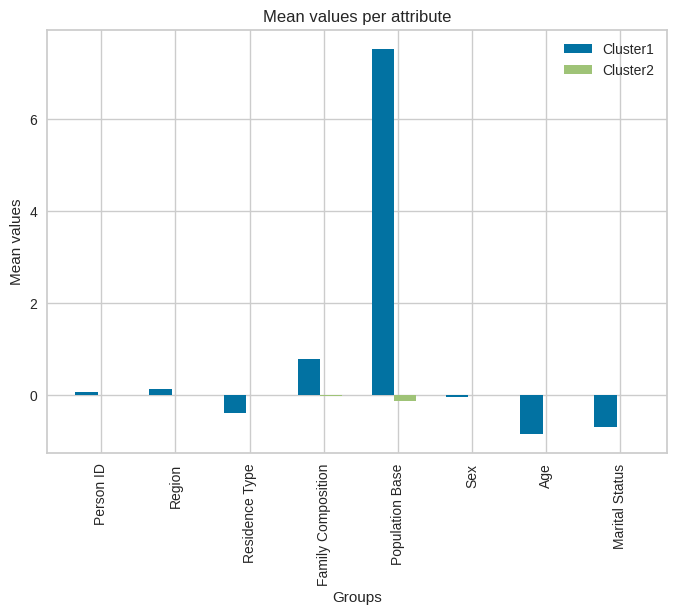

In [57]:
X = cluster1A.keys()[:8]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1A_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2A_mean_p1, 0.3, label = 'Cluster2')
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()


In [58]:
cluster1A_mean_p2 = cluster1A_mean[:8]
cluster2A_mean_p2 = cluster2A_mean[:8]

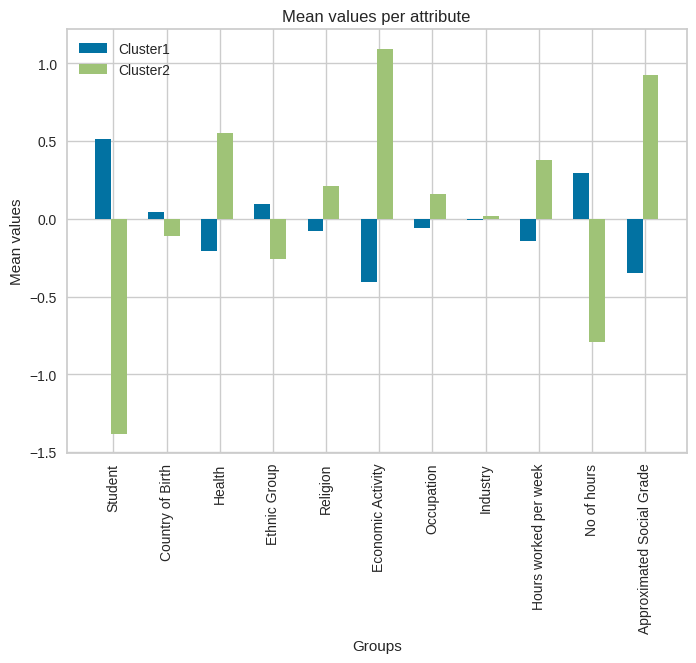

In [59]:
X = cluster1.keys()[8:-1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')


plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [60]:
algorithms = ['K-Means', 'Agglomerative']
Silhouette_Score = [kmeans_silhouette, Agglomerative_silhouette]
cluster1_coverage = [cluster1.shape[0], len(cluster1A.value_counts())]
cluster2_coverage = [cluster2.shape[0], len(cluster2A.value_counts())]
compare_models = pd.DataFrame({ 'Algorithms': algorithms, 'Cluster 1 Coverage': cluster1_coverage, 'Cluster 2 Coverage': cluster2_coverage, 'Silhouette Score': Silhouette_Score})
compare_models.sort_values(by = 'Silhouette Score', ascending = False).reset_index(drop=True)

,Algorithms,Cluster 1 Coverage,Cluster 2 Coverage,Silhouette Score
0,Agglomerative,887,56087,0.46
1,K-Means,41529,15445,0.18
